# **PROJECT AKHIR**

## **BUSINESS UNDERSTANDING**

### 1.1 Latar Belakang Masalah

Penyakit kardiovaskular (Cardiovascular Disease/CVD) merupakan salah satu penyebab utama mortalitas secara global. Deteksi dini kelainan jantung sangat krusial untuk penanganan yang efektif. Salah satu metode diagnosis awal yang paling umum, murah, dan mudah diakses adalah auskultasi jantung menggunakan stetoskop untuk menganalisis sinyal Phonocardiogram (PCG).

Namun, interpretasi suara jantung secara manual memiliki keterbatasan yang signifikan. Seperti disebutkan dalam penelitian Liu et al. (2016) pada PhysioNet/Computing in Cardiology Challenge, akurasi auskultasi sangat bergantung pada keahlian dan pendengaran dokter (subjektif). Selain itu, perekaman di lingkungan non-klinis sering kali terkontaminasi oleh noise atau gangguan suara eksternal, yang mempersulit diagnosis.

Oleh karena itu, diperlukan sistem Computer-Aided Diagnosis (CAD) yang objektif untuk mengklasifikasikan suara jantung menjadi kategori Normal atau Abnormal. Penelitian ini bertujuan membangun model klasifikasi otomatis menggunakan algoritma Support Vector Machine (SVM) dengan memanfaatkan data yang telah dikonversi menjadi representasi frekuensi (Spectrogram), sehingga pola patologis dapat dideteksi dengan lebih akurat dibandingkan analisis manual.

### 1.2 Tujuan Bisnis (Business Objectives)

Tujuan utama pengembangan sistem ini adalah:

1. Deteksi Dini : 
Menyediakan alat bantu yang dapat mendeteksi kelainan suara jantung sejak awal sehingga pasien dapat segera mendapatkan pemeriksaan lanjutan.

2. Efisiensi Diagnostik : 
Mengurangi beban dokter spesialis dengan menyeleksi pasien yang memang memerlukan penanganan lebih lanjut.

3. Aksesibilitas : 
Memungkinkan tenaga medis di fasilitas kesehatan sederhana untuk melakukan pemeriksaan awal tanpa memerlukan alat mahal, karena data yang digunakan berasal dari berbagai lingkungan termasuk tempat non-klinis.

### 1.3 Tujuan Teknis (Data Mining Goals)

Untuk mencapai tujuan bisnis tersebut, tujuan teknis proyek ini adalah:

1. Membangun Model Klasifikasi : Mengembangkan model Machine Learning yang dapat membedakan suara jantung Normal dan Abnormal.

2. Memanfaatkan Spectrogram sebagai Fitur : Dataset yang digunakan sudah berupa spectrogram multivariate, di mana setiap fitur merepresentasikan pita frekuensi suara jantung, bukan gelombang suara mentah.Karena itu, fokus pemrosesan data lebih kepada penyusunan fitur agar siap digunakan model, bukan ekstraksi audio dari nol.

3. Mengoptimalkan Metrik Evaluasi: 

Model harus mencapai nilai yang baik pada metrik:

- Akurasi

- Presisi

- Recall

Penekanan utama adalah pada Recall kelas Abnormal untuk menghindari kasus False Negative (pasien sakit tetapi diklasifikasikan sehat).

### 1.4 Penilaian Situasi (Assess Situation)

Beberapa kondisi penting yang perlu dipertimbangkan:

1. Struktur Dataset : Data berbentuk spectrogram multivariate, bukan sinyal audio mentah.
Setiap instance mewakili potongan suara jantung selama 5 detik dalam bentuk intensitas frekuensi.

2. Ketidakseimbangan Kelas

Jumlah data tidak seimbang:

- Normal: 57 data 

- Abnormal: 147 data

- Model berpotensi bias memprediksi “Abnormal”, sehingga teknik seperti:

- penentuan bobot kelas (class weight) 

3. Variasi Data yang Tinggi

Data direkam dari berbagai lokasi tubuh (aorta, pulmonal, dll) dan dari berbagai rentang usia. Hal ini membuat data sangat bervariasi sehingga model harus cukup tangguh terhadap perbedaan karakteristik rekaman.

### 1.5 Rencana Deployment

Model yang dihasilkan akan diimplementasikan pada aplikasi berbasis web (Streamlit). Aplikasi tersebut akan menyediakan fitur:

1. mengunggah file suara jantung dalam format dataset,

2. memproses data menjadi input bagi model,

3. menampilkan hasil klasifikasi Normal atau Abnormal,

4. menyertakan visualisasi pendukung seperti spectrogram.

Aplikasi ini ditujukan untuk digunakan tenaga medis sebagai alat bantu skrining awal, bukan sebagai pengganti diagnosis dokter.

## **DATA UNDERSTANDING**

Bagian ini menjelaskan proses pemahaman data yang digunakan pada penelitian, mulai dari pemuatan data, pemeriksaan struktur, distribusi kelas, hingga eksplorasi visual terhadap bentuk spectrogram. Seluruh proses dijelaskan secara bertahap agar memberikan gambaran menyeluruh tentang karakteristik dataset.

### 2.1 Penjelasan Dataset (Spectrogram) 

Dataset yang digunakan dalam penelitian ini diadopsi dari beberapa sumber dataset seperti :

Referensi Dataset : 
- https://open.umich.edu/find/open-educational-resources/medical/heart-sound-murmur-library
- https://istethoscope.peterjbentley.com/heartchallenge/index.html
- https://physionet.org/content/circor-heart-sound/1.0.0/


Data ini merupakan kumpulan rekaman suara jantung yang dikumpulkan dari berbagai sumber di seluruh dunia, mencakup subjek sehat dan pasien dengan kondisi patologis (seperti kelainan katup jantung dan penyakit arteri koroner).Berbeda dengan data audio mentah (raw wav), dataset yang digunakan dalam penelitian ini telah melalui proses transformasi menjadi format Multivariate Spectrogram.

- Struktur Data: Data disimpan dalam format runtun waktu (Time Series) dengan dimensi 61 x 405, di mana 61 merepresentasikan pita frekuensi (frequency bands) dan 405 merepresentasikan titik waktu (timepoints).

- Kategori Label: Data terbagi menjadi dua kelas, yaitu Normal (subjek sehat) dan Abnormal (subjek dengan diagnosis jantung dikonfirmasi).

- Karakteristik: Dataset ini memiliki tantangan berupa ketidakseimbangan kelas (class imbalance) dan variasi sinyal yang tinggi karena 
data direkam dari lokasi tubuh yang berbeda (aorta, pulmonal, mitral, trikuspid).

Penggunaan representasi spectrogram dipilih karena mampu memvisualisasikan intensitas energi pada berbagai frekuensi, yang mana fitur ini sangat relevan untuk mendeteksi murmur atau suara tambahan pada jantung abnormal.

#### 2.1.1 Transformasi Sinyal Jantung ke Spectrogram

Sinyal suara jantung yang direkam menggunakan stetoskop digital pada awalnya berbentuk domain waktu (time domain). Pada bentuk ini, grafik hanya memperlihatkan perubahan amplitudo atau keras–lemahnya suara terhadap waktu. Namun, tampilan ini belum menunjukkan informasi frekuensi, padahal kelainan suara jantung seperti murmur biasanya muncul pada rentang frekuensi tertentu, misalnya frekuensi tinggi di atas 200 Hz.

Untuk mendapatkan informasi frekuensi, sinyal perlu diubah ke domain frekuensi. Akan tetapi, penggunaan Fast Fourier Transform (FFT) biasa memiliki kelemahan, yaitu kehilangan informasi waktu. Dengan FFT, kita dapat mengetahui frekuensi apa saja yang ada, tetapi tidak dapat mengetahui kapan frekuensi tersebut muncul, misalnya apakah terjadi saat fase sistol atau diastol.

Oleh karena itu, penelitian ini menggunakan spectrogram sebagai representasi sinyal suara jantung. Spectrogram dihasilkan melalui metode Short-Time Fourier Transform (STFT), yang mampu menampilkan informasi waktu dan frekuensi secara bersamaan.

Proses STFT dilakukan dengan langkah-langkah sebagai berikut:

1. Sinyal suara yang panjang dibagi menjadi potongan-potongan kecil (window) yang saling tumpang tindih (overlap).

2. Setiap potongan kecil tersebut dianalisis menggunakan FFT.

3. Hasil dari setiap potongan kemudian disusun secara berurutan berdasarkan waktu.

4. Hasil akhirnya adalah gambar spectrogram yang memuat tiga informasi utama:

- Sumbu X (Waktu) menunjukkan durasi atau urutan detak jantung.

- Sumbu Y (Frekuensi) menunjukkan tinggi atau rendahnya frekuensi suara.

- Warna atau intensitas menunjukkan kekuatan energi suara pada waktu dan frekuensi tertentu.

Dengan menggunakan spectrogram, pola suara jantung—termasuk adanya murmur—dapat lebih mudah dikenali karena informasi waktu dan frekuensi ditampilkan secara bersamaan.

### 2.2 Import Library & Memuat Dataset

Langkah pertama adalah menyiapkan semua library yang dibutuhkan, lalu memuat dataset time series dari file .ts.Dataset menggunakan format .ts (Time Series), sehingga tidak bisa dibaca dengan read_csv.Oleh karena itu, kita memakai fungsi khusus load_from_tsfile dari library sktime.
Data dikembalikan dalam bentuk 3 dimensi:

1. Sampel / Pasien

2. Fitur (frekuensi)

3. Waktu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.datasets import load_from_tsfile
from collections import Counter

print("--- PROSES 1: LOAD DATASET ---")

# 1. Tentukan lokasi file (Sesuaikan jika beda folder)
train_file = "C:\\Dokumen\\PSD\\proyek akhir\\datasest\\Heartbeat_TRAIN.ts"
test_file = "C:\\Dokumen\\PSD\\proyek akhir\\datasest\\Heartbeat_TEST.ts"

# 2. Muat Data
# return_data_type="numpy3d" artinya kita minta format 3 Dimensi (Pasien, Fitur, Waktu)
print("Sedang memuat data... (Mohon tunggu)")
X_train_raw, y_train_raw = load_from_tsfile(train_file, return_data_type="numpy3d")
X_test_raw, y_test_raw = load_from_tsfile(test_file, return_data_type="numpy3d")

print("[SUKSES] Data berhasil dimuat ke memori.")

--- PROSES 1: LOAD DATASET ---
Sedang memuat data... (Mohon tunggu)


[SUKSES] Data berhasil dimuat ke memori.


### 2.3 Pembersihan Label (Bytes → String)

Pada beberapa dataset, label kelas masih berbentuk bytes seperti b'Normal'.
Jika tidak diperbaiki, ini bisa menyebabkan error saat visualisasi atau modeling.
Kita mengecek apakah label masih bertipe bytes.
Jika iya, label diubah menjadi string biasa ('Normal', 'Abnormal').
Langkah ini penting agar proses analisis dan visualisasi berjalan lancar.

In [2]:
print("\n--- PROSES 2: CLEANING LABEL (BYTES TO STRING) ---")

# Cek apakah data pertama berupa bytes?
if isinstance(y_train_raw[0], bytes):
    print("Terdeteksi format bytes. Sedang memperbaiki...")
    # Decode Train
    y_train_raw = np.array([y.decode('utf-8') for y in y_train_raw])
    # Decode Test
    y_test_raw = np.array([y.decode('utf-8') for y in y_test_raw])
    print("[INFO] Label berhasil diubah menjadi String biasa.")
else:
    print("[INFO] Format label sudah aman (String).")

# Tampilkan contoh label
print(f"Contoh Label: {y_train_raw[:5]}")


--- PROSES 2: CLEANING LABEL (BYTES TO STRING) ---
[INFO] Format label sudah aman (String).
Contoh Label: ['normal' 'normal' 'normal' 'normal' 'normal']


### 2.4 Mengecek Dimensi dan Struktur Data

Pada tahap ini, kita memastikan ukuran dan struktur dataset yang kita gunakan.Dataset ini berbentuk Multivariate Time Series 3D, di mana setiap sampel merepresentasikan satu rekaman suara jantung yang terdiri dari beberapa pita frekuensi dan urutan waktu tertentu.

In [3]:
print("\n--- PROSES 3: CEK DIMENSI DATA (SHAPE) ---")

# .shape akan menghasilkan (Jumlah Sampel, Jumlah Fitur, Panjang Waktu)
n_samples, n_freqs, n_times = X_train_raw.shape

print(f"Bentuk Data Training Asli : {X_train_raw.shape}")
print("-" * 40)
print(f"1. Jumlah Pasien (Sampel) : {n_samples} orang")
print(f"2. Jumlah Pita Frekuensi  : {n_freqs} pita (Fitur Spektral)")
print(f"3. Durasi Waktu (Time)    : {n_times} titik waktu")
print("-" * 40)
print(f"Jumlah Data Testing       : {X_test_raw.shape[0]} orang")


--- PROSES 3: CEK DIMENSI DATA (SHAPE) ---
Bentuk Data Training Asli : (204, 61, 405)
----------------------------------------
1. Jumlah Pasien (Sampel) : 204 orang
2. Jumlah Pita Frekuensi  : 61 pita (Fitur Spektral)
3. Durasi Waktu (Time)    : 405 titik waktu
----------------------------------------
Jumlah Data Testing       : 205 orang


### 2.5 Analisis Keseimbangan Kelas (Class Imbalance)

Langkah ini bertujuan untuk melihat apakah jumlah data Normal dan Abnormal seimbang atau tidak.Grafik ini menunjukkan perbandingan jumlah data tiap kelas.


--- PROSES 4: CEK KESEIMBANGAN KELAS (VISUALISASI) ---
Rincian Jumlah Data: Counter({'abnormal': 147, 'normal': 57})


C:\Users\ahabi\AppData\Local\Temp\ipykernel_15936\3621272935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train_raw, palette='viridis')


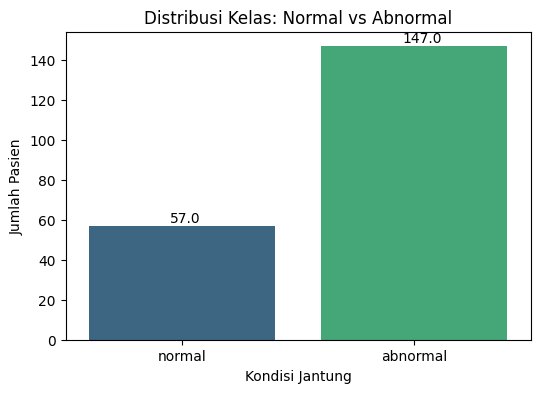

In [4]:
print("\n--- PROSES 4: CEK KESEIMBANGAN KELAS (VISUALISASI) ---")

# Hitung jumlah masing-masing
jumlah_kelas = Counter(y_train_raw)
print(f"Rincian Jumlah Data: {jumlah_kelas}")

# Buat Grafik Batang
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y_train_raw, palette='viridis')

# Tambahkan angka di atas batang biar jelas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 2))

plt.title("Distribusi Kelas: Normal vs Abnormal")
plt.xlabel("Kondisi Jantung")
plt.ylabel("Jumlah Pasien")
plt.show()

Untuk menentukan tingkat ketidakseimbangan dataset, dilakukan perhitungan persentase distribusi kelas dan rasio ketidakseimbangan (Imbalance Ratio / IR).

- Kelas Abnormal (Mayoritas): 148 sampel (72.2%)
- Kelas Normal (Minoritas): 57 sampel (27.8%)

Menurut literatur Machine Learning dari Google Developers (2022), tingkat ketidakseimbangan data dikategorikan sebagai berikut:

1. Ringan (Mild)
Ketidakseimbangan data berada pada kisaran 20%–40% kelas minoritas.
Pada kondisi ini, bias terhadap kelas minoritas relatif kecil sehingga sering kali tidak memerlukan penanganan khusus.

2. Sedang (Moderate)
Proporsi kelas minoritas berada pada kisaran 1%–20%.
Ketidakseimbangan mulai terlihat signifikan dan memerlukan teknik penanganan, seperti class weighting atau resampling.

3. Ekstrem (Extreme)
Proporsi kelas minoritas kurang dari 1%.
Dataset sangat tidak seimbang sehingga membutuhkan penanganan khusus, misalnya pendekatan anomaly detection atau metode khusus lainnya

Berdasarkan tabel di atas, dataset penelitian ini dengan proporsi kelas minoritas sebesar 27.8% masuk dalam kategori Ketidakseimbangan Ringan hingga Sedang (Mild to Moderate Imbalance).

Meskipun belum masuk kategori ekstrem, rasio hampir 3:1 (148 banding 57) sudah cukup untuk mempengaruhi Hyperplane pada algoritma SVM. SVM standar cenderung memaksimalkan akurasi global dengan memprioritaskan kelas mayoritas, yang berisiko menyebabkan Recall rendah pada kelas Normal. Oleh karena itu, intervensi menggunakan metode Class Weighting tetap diperlukan untuk memastikan model berlaku adil terhadap kedua kelas.

### 2.6 Visualisasi Data (Spectrogram)

Agar tidak hanya melihat angka, kita menampilkan visualisasi spectrogram dari data suara jantung.

Visualisasi spectrogram memperlihatkan pola energi suara jantung.
Sumbu horizontal menunjukkan waktu, sumbu vertikal menunjukkan frekuensi, dan warna menunjukkan intensitas sinyal.


--- PROSES 5: VISUALISASI SPECTROGRAM (HEATMAP) ---
Label yang tersedia di data: ['abnormal' 'normal']
Mengambil contoh 'abnormal' di index 57
Mengambil contoh 'normal' di index 0


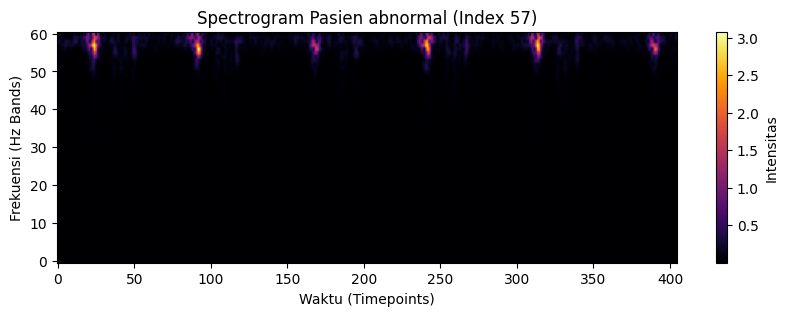

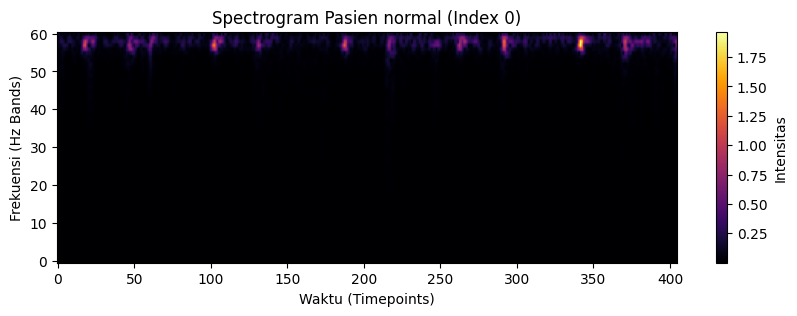

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print("\n--- PROSES 5: VISUALISASI SPECTROGRAM (HEATMAP) ---")

# 1. CEK DULU NAMA LABELNYA
unique_labels = np.unique(y_train_raw)
print(f"Label yang tersedia di data: {unique_labels}")

# 2. CARI INDEX BERDASARKAN LABEL YANG BENAR
# Kita pakai logika otomatis: Ambil label pertama dan kedua dari daftar di atas
label_1 = unique_labels[0] # Biasanya 'abnormal'
label_2 = unique_labels[1] # Biasanya 'normal'

# Cari lokasi data
idx_1 = np.where(y_train_raw == label_1)[0][0]
idx_2 = np.where(y_train_raw == label_2)[0][0]

print(f"Mengambil contoh '{label_1}' di index {idx_1}")
print(f"Mengambil contoh '{label_2}' di index {idx_2}")

# 3. FUNGSI GAMBAR
def plot_spectrogram(data, judul):
    plt.figure(figsize=(10, 3))
    plt.imshow(data, aspect='auto', origin='lower', cmap='inferno')
    plt.title(judul)
    plt.xlabel("Waktu (Timepoints)")
    plt.ylabel("Frekuensi (Hz Bands)")
    plt.colorbar(label="Intensitas")
    plt.show()

# 4. TAMPILKAN
plot_spectrogram(X_train_raw[idx_1], f"Spectrogram Pasien {label_1} (Index {idx_1})")
plot_spectrogram(X_train_raw[idx_2], f"Spectrogram Pasien {label_2} (Index {idx_2})")

Pada visualisasi di atas, sumbu horizontal (X) merepresentasikan waktu (Timepoints) dan sumbu vertikal (Y) merepresentasikan pita frekuensi (Frequency Bands). Warna merepresentasikan intensitas atau energi suara, di mana warna gelap (Hitam/Ungu) menunjukkan energi rendah, sedangkan warna terang (Oranye/Kuning) menunjukkan energi tinggi.

Berdasarkan pengamatan visual diatas, dapat dianalisis perbedaan spesifik sebagai berikut:

1. Distribusi Energi Frekuensi: Pada dataset ini, energi suara dominan terkonsentrasi pada pita frekuensi tinggi (Band ke-50 hingga 60). Hal ini terlihat dari pola warna kuning terang yang berkumpul di bagian atas grafik.

2. Karakteristik Pasien Normal (Index 0 - Grafik Bawah):

- Pola Ritmis yang Bersih: Terlihat adanya pola letupan (bursts) energi yang terpisah secara tegas. Letupan kuning ini merepresentasikan suara jantung utama (S1 dan S2).

- Interval Hening (Silence): Area di antara letupan energi cenderung berwarna gelap (ungu tua/hitam). Hal ini menunjukkan bahwa pada fase diastol dan sistol (saat jantung rileks atau memompa), tidak ada suara bising tambahan yang signifikan.

- Intensitas Energi: Skala intensitas maksimal pada pasien normal cenderung lebih rendah, yaitu sekitar 1.8 pada color bar.

3. Karakteristik Pasien Abnormal (Index 57 - Grafik Atas):

- Pola yang "Kotor" (Smearing): Berbeda dengan pasien normal, area di antara letupan suara utama tidak sepenuhnya gelap. Terdapat jejak energi (warna ungu/oranye samar) yang "menggantung" atau menyambung di antara detak jantung utama pada pita frekuensi 50-60 Hz.

- Indikasi Murmur: Adanya energi tambahan di antara fase detak jantung ini mengindikasikan keberadaan murmur (suara desising akibat aliran darah turbulen), yang merupakan tanda khas kelainan katup jantung. Sinyal suara tidak pernah benar-benar "hening" seperti pada pasien normal.

- Intensitas Energi Tinggi: Skala intensitas pada pasien abnormal mencapai angka 3.0, yang mengindikasikan bahwa suara patologis (kelainan) pada pasien ini memiliki amplitudo energi yang jauh lebih tinggi atau lebih keras dibandingkan suara jantung normal.

## **DATA PREPROCESSING**

Pada tahap Data Preprocessing, kita akan mengolah data mentah yang sebelumnya masih berbentuk spectrogram 3 dimensi menjadi data tabel 2 dimensi yang rapi dan siap digunakan untuk proses pelatihan model machine learning.

Tujuan utama tahap ini adalah:

1. Menyederhanakan data time series

2. Mengubah data menjadi bentuk numerik yang bisa dipahami algoritma

3. Menyeragamkan skala data agar model bekerja optimal


### 3.1 Membuat Fungsi Ekstraksi Fitur

Data awal masih memiliki dimensi waktu (405 titik).
Karena algoritma seperti SVM tidak bisa langsung membaca data gelombang, kita perlu meringkas informasi waktu tersebut menjadi beberapa angka statistik.

Statistik yang digunakan:

- Mean (Rata-rata) → menunjukkan kekuatan sinyal secara umum

- Standard Deviation (Std) → menunjukkan kestabilan atau variasi sinyal

- Maximum (Max) → menunjukkan lonjakan tertinggi sinyal

- Minimum (Min) → menunjukkan nilai terendah sinyal

Data Setelah di ekstraksi Fitur:

- Kolom 0-60: Adalah Mean (Rata-rata) tiap frekuensi.

- Kolom 61-121: Adalah Std (Standar Deviasi).

- Kolom 122-182: Adalah Max.

- Kolom 183-243: Adalah Min.

- Kolom Terakhir: Label Target (0 atau 1).


Setiap pasien awalnya memiliki 61 × 405 nilai.Setelah diringkas, setiap pasien hanya diwakili oleh 244 angka.Ini membuat data jauh lebih ringan dan mudah diproses model

In [6]:
import numpy as np

print("--- PROSES 1: DEFINISI FUNGSI EKSTRAKSI FITUR ---")

def extract_features(X_data):
    # X_data shape: (Jumlah Pasien, 61 Frekuensi, 405 Waktu)
    features = []
    
    print(f"Memproses {len(X_data)} sampel data...")
    
    for i in range(len(X_data)):
        spectrogram = X_data[i]
        
        # Hitung statistik sepanjang waktu (axis=1)
        # Artinya: Kita ringkas 405 titik waktu menjadi 1 angka statistik
        mean_val = np.mean(spectrogram, axis=1) # Rata-rata kekuatan sinyal
        std_val = np.std(spectrogram, axis=1)   # Kestabilan sinyal
        max_val = np.max(spectrogram, axis=1)   # Lonjakan tertinggi
        min_val = np.min(spectrogram, axis=1)   # Titik terendah
        
        # Gabungkan semua statistik jadi satu baris panjang
        # 4 Statistik x 61 Frekuensi = 244 Fitur
        patient_features = np.concatenate([mean_val, std_val, max_val, min_val])
        features.append(patient_features)
        
    return np.array(features)

print("[SUKSES] Fungsi 'extract_features' berhasil dibuat.")

--- PROSES 1: DEFINISI FUNGSI EKSTRAKSI FITUR ---
[SUKSES] Fungsi 'extract_features' berhasil dibuat.


### 3.2 Ekstraksi Fitur Statistik

Ekstraksi Fitur pada Data Training

Setelah fungsi dibuat, kita terapkan pada data training mentah.
Proses ini menjadi inti dari preprocessing karena secara efektif mengubah sinyal deret waktu menjadi representasi numerik ringkas yang tetap mempertahankan karakteristik penting dari data.
Jika bentuk akhirnya (jumlah_pasien, 244), berarti proses berhasil,Data sudah berubah dari gelombang 3D → tabel 2D.

In [7]:
print("\n--- PROSES 2: EKSEKUSI EKSTRAKSI FITUR (TRAIN) ---")

# Terapkan fungsi ke data mentah
X_train_processed = extract_features(X_train_raw)

print("-" * 40)
print(f"Bentuk Data SEBELUM (3D) : {X_train_raw.shape}")
print(f"Bentuk Data SESUDAH (2D) : {X_train_processed.shape}")
print("-" * 40)
print("Artinya: Sekarang setiap pasien diwakili oleh 244 angka statistik.")


--- PROSES 2: EKSEKUSI EKSTRAKSI FITUR (TRAIN) ---
Memproses 204 sampel data...
----------------------------------------
Bentuk Data SEBELUM (3D) : (204, 61, 405)
Bentuk Data SESUDAH (2D) : (204, 244)
----------------------------------------
Artinya: Sekarang setiap pasien diwakili oleh 244 angka statistik.


### 3.3 Encoding Label Target

Model Machine Learning tidak dapat memahami format label berupa teks (misalnya “Normal” dan “Abnormal”). Oleh sebab itu, dilakukan proses Label Encoding untuk mengubah label kategori menjadi representasi numerik.

Dalam proses ini, setiap kelas diberikan angka berbeda—misalnya:

1. Abnormal → 0

2. Normal → 1

Urutan pemetaan ini ditentukan secara otomatis oleh library berdasarkan urutan alfabet. Langkah ini memastikan label dapat diproses oleh algoritma klasifikasi pada tahap selanjutnya.

In [8]:
from sklearn.preprocessing import LabelEncoder

print("\n--- PROSES 3: LABEL ENCODING ---")

# Inisialisasi Encoder
le = LabelEncoder()

# Ubah label teks jadi angka
y_train_encoded = le.fit_transform(y_train_raw)

# Cek hasil terjemahan
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(f"Kamus Terjemahan : {mapping}")
print(f"Contoh 5 Label Asli : {y_train_raw[:5]}")
print(f"Contoh 5 Label Angka: {y_train_encoded[:5]}")


--- PROSES 3: LABEL ENCODING ---
Kamus Terjemahan : {'abnormal': 0, 'normal': 1}
Contoh 5 Label Asli : ['normal' 'normal' 'normal' 'normal' 'normal']
Contoh 5 Label Angka: [1 1 1 1 1]


### 3.4. Standarisasi Fitur (Scaling)

Standarisasi merupakan langkah penting terutama untuk algoritma seperti Support Vector Machine (SVM) yang sangat bergantung pada perhitungan jarak antar data. Jika fitur memiliki skala nilai yang berbeda jauh, maka fitur dengan rentang besar akan mendominasi proses perhitungan dan menyebabkan bias pada model.

Untuk mengatasi hal tersebut, digunakan StandardScaler, yang mengubah seluruh fitur menjadi memiliki:

- mean = 0

- standard deviation = 1

Proses fit dilakukan hanya pada data latih untuk menghindari data leakage, kemudian informasi skala tersebut diterapkan pada data uji. Dengan demikian, seluruh fitur memiliki skala yang seragam sehingga algoritma dapat bekerja secara optimal.

In [9]:
from sklearn.preprocessing import StandardScaler

print("\n--- PROSES 4: SCALING (STANDARISASI) ---")

# Inisialisasi Scaler
scaler = StandardScaler()

# Pelajari pola data train, lalu ubah nilainya
X_train_scaled = scaler.fit_transform(X_train_processed)

print("Contoh data sebelum scaling (Baris 0, Fitur 0):", X_train_processed[0][0])
print("Contoh data sesudah scaling (Baris 0, Fitur 0):", X_train_scaled[0][0])
print("[SUKSES] Data sudah dinormalisasi (Mean=0, Std=1).")


--- PROSES 4: SCALING (STANDARISASI) ---
Contoh data sebelum scaling (Baris 0, Fitur 0): 0.0011163358024691358
Contoh data sesudah scaling (Baris 0, Fitur 0): -0.4583039815163842
[SUKSES] Data sudah dinormalisasi (Mean=0, Std=1).


### 3.5 Verifikasi Data Akhir

Tahap terakhir bertujuan untuk memverifikasi bahwa seluruh proses preprocessing sudah berjalan dengan benar dan data telah siap digunakan pada tahap pemodelan. Pada tahap ini dilakukan:

1. Penyusunan nama fitur yang informatif, seperti Mean_F0, Std_F10, Max_F25, dan seterusnya.

2. Penyusunan data ke dalam bentuk DataFrame sehingga lebih mudah dianalisis.

3. Pemeriksaan dimensi akhir data untuk memastikan jumlah fitur dan sampel telah sesuai dengan rancangan.

Data akhir memiliki 244 fitur hasil ekstraksi, ditambah 1 kolom target, sehingga siap digunakan untuk melatih model Machine Learning.

In [10]:
import pandas as pd

print("\n--- PROSES 5: MENAMPILKAN DATA SIAP LATIH ---")

n_freqs = 61
cols = ([f"Mean_F{i}" for i in range(n_freqs)] + 
        [f"Std_F{i}" for i in range(n_freqs)] + 
        [f"Max_F{i}" for i in range(n_freqs)] + 
        [f"Min_F{i}" for i in range(n_freqs)])

# Buat DataFrame
df_final_train = pd.DataFrame(X_train_scaled, columns=cols)
df_final_train['TARGET_LABEL'] = y_train_encoded

# Tampilkan 5 baris pertama
print("Tabel Data Preprocessing (5 Baris Pertama):")
# Kita tampilin beberapa kolom aja biar muat di layar
kolom_tampil = ['Mean_F0', 'Std_F0', 'Max_F0', 'Min_F0', 'TARGET_LABEL']
print(df_final_train[kolom_tampil].head().to_markdown(index=False))

print(f"\nTotal Fitur Input: {X_train_scaled.shape[1]}")
print(f"Total Pasien     : {X_train_scaled.shape[0]}")


--- PROSES 5: MENAMPILKAN DATA SIAP LATIH ---
Tabel Data Preprocessing (5 Baris Pertama):
|    Mean_F0 |     Std_F0 |     Max_F0 |    Min_F0 |   TARGET_LABEL |
|-----------:|-----------:|-----------:|----------:|---------------:|
| -0.458304  | -0.447182  | -0.445061  | -0.442851 |              1 |
|  0.906293  |  0.116471  | -0.0359569 |  2.00212  |              1 |
| -0.354999  | -0.268734  | -0.306436  | -0.509532 |              1 |
| -0.107073  | -0.0862004 | -0.0590663 | -0.456743 |              1 |
| -0.0475289 | -0.0757501 | -0.101441  |  0.229516 |              1 |

Total Fitur Input: 244
Total Pasien     : 204


## **DATA SPLITTING**

Pada tahap ini, kita melakukan penataan ulang pembagian data agar sesuai dengan standar akademik dan praktik machine learning yang umum digunakan.

Dataset bawaan sebenarnya sudah memiliki data Train dan Test, tetapi pembagiannya 50% : 50% (204 : 205).
Pembagian ini kurang lazim untuk penelitian karena:

- Data latih terlalu sedikit

- Model berisiko kurang belajar pola

Oleh karena itu, kita akan menyusun ulang pembagian data menjadi:

- 80% Data Training

- 20% Data Testing

Langkah ini menunjukkan bahwa kamu memahami metodologi, bukan sekadar mengikuti dataset mentah.

### 4.1 Memuat & Mengacak Data Test Asli

Pertama, kita memuat data test bawaan, lalu mengacak urutan datanya.Agar data yang diambil nanti acak dan representatif.Menghindari bias akibat urutan data asli

In [11]:
from sklearn.utils import shuffle
from sktime.datasets import load_from_tsfile
import numpy as np

print("--- PROSES 1: LOAD & SHUFFLE DATA TEST ---")

# 1. Load Data Test Mentah
# Pastikan nama file sesuai
X_test_raw, y_test_raw = load_from_tsfile("C:\\Dokumen\\PSD\\proyek akhir\\datasest\\Heartbeat_TEST.ts", return_data_type="numpy3d")

# 2. Perbaiki Label (Bytes -> String)
# Sama seperti Bab 1, kita jaga-jaga kalau formatnya bytes
if isinstance(y_test_raw[0], bytes):
    y_test_raw = np.array([y.decode('utf-8') for y in y_test_raw])

# 3. Acak Posisi Data (PENTING!)
# random_state=42 agar hasil acakannya konsisten (tidak berubah tiap di-run)
X_test_raw, y_test_raw = shuffle(X_test_raw, y_test_raw, random_state=42)

print("[INFO] Data Test berhasil dimuat dan diacak.")
print(f"Total Data Test Tersedia: {X_test_raw.shape[0]} sampel")

--- PROSES 1: LOAD & SHUFFLE DATA TEST ---


[INFO] Data Test berhasil dimuat dan diacak.
Total Data Test Tersedia: 205 sampel


### 4.2 Logika Pembagian Data (80:20)

Sekarang kita terapkan logika matematis pembagian data.

📊 Perhitungan

- Data training yang sudah kita punya: 204 sampel

- Kita anggap ini sebagai 80%

- Maka 20% ≈ 51 sampel

- Total data test awal: 205 sampel

- Sisa data: 154 sampel

Data sisa ini tidak dibuang, melainkan disimpan untuk demo aplikasi Streamlit.

In [12]:
print("\n--- PROSES 2: PEMBAGIAN DATA (SPLITTING 80:20) ---")

# Target jumlah data test agar rasio 80:20 terpenuhi
jumlah_test_official = 51

# 1. Ambil 51 data pertama untuk "Ujian Skripsi" (Laporan)
X_test_final = X_test_raw[:jumlah_test_official]
y_test_final = y_test_raw[:jumlah_test_official]

# 2. Ambil sisanya untuk "Mainan Streamlit" (Demo)
X_demo_streamlit = X_test_raw[jumlah_test_official:]
y_demo_streamlit = y_test_raw[jumlah_test_official:]

print("REKAPITULASI PEMBAGIAN DATA:")
print(f"1. Data Training (Tetap)     : 204 Sampel (80%) -> Dipakai Latih Model")
print(f"2. Data Testing Baru (Ujian) : {len(X_test_final)}  Sampel (20%) -> Dipakai Evaluasi")
print(f"3. Data Sisa (Untuk Demo)    : {len(X_demo_streamlit)} Sampel (Disimpan) -> Dipakai Streamlit")


--- PROSES 2: PEMBAGIAN DATA (SPLITTING 80:20) ---
REKAPITULASI PEMBAGIAN DATA:
1. Data Training (Tetap)     : 204 Sampel (80%) -> Dipakai Latih Model
2. Data Testing Baru (Ujian) : 51  Sampel (20%) -> Dipakai Evaluasi
3. Data Sisa (Untuk Demo)    : 154 Sampel (Disimpan) -> Dipakai Streamlit


### 4.3 Preprocessing Data Test Baru

Data test baru (51 sampel) masih berbentuk spectrogram 3D, sehingga perlu diproses sama seperti data training.

Catatan :

- Kita tidak boleh menghitung ulang scaler dan encoder

- Data uji harus mengikuti aturan yang dipelajari dari data latih

In [13]:
print("\n--- PROSES 3: PREPROCESSING DATA TEST BARU ---")

# 1. Ekstraksi Fitur (Ubah 3D jadi 2D Statistik)
# Kita panggil fungsi 'extract_features' yang sudah kita buat di Bab 2
X_test_final_features = extract_features(X_test_final)

# 2. Scaling (Standarisasi)
# PENTING: Gunakan 'scaler' yang sudah dilatih di Bab 2!
X_test_final_scaled = scaler.transform(X_test_final_features)

# 3. Encoding Label (Ubah Normal jadi Angka)
# PENTING: Gunakan 'le' yang sudah dilatih di Bab 2!
y_test_final_encoded = le.transform(y_test_final)

print(f"[SUKSES] Data Test Baru siap. Bentuk: {X_test_final_scaled.shape}")


--- PROSES 3: PREPROCESSING DATA TEST BARU ---
Memproses 51 sampel data...
[SUKSES] Data Test Baru siap. Bentuk: (51, 244)


### 4.4 Menyimpan Data Demo untuk Streamlit

Sisa data (154 sampel) kita simpan ke dalam file agar bisa digunakan pada aplikasi demo Streamlit.

In [14]:
import pickle

print("\n--- PROSES 4: SIMPAN DATA DEMO STREAMLIT ---")

# Bungkus data mentah dan labelnya dalam Dictionary
paket_demo = {
    "X_raw": X_demo_streamlit,  # Data mentah (masih bentuk spectrogram)
    "y_label": y_demo_streamlit # Label asli
}

nama_file_demo = "data_demo_streamlit.pkl"

# Simpan ke file
with open(nama_file_demo, 'wb') as f:
    pickle.dump(paket_demo, f)

print(f"[SUKSES] File '{nama_file_demo}' berhasil dibuat!")
print("Simpan file ini. Nanti akan kita upload saat demo aplikasi.")


--- PROSES 4: SIMPAN DATA DEMO STREAMLIT ---
[SUKSES] File 'data_demo_streamlit.pkl' berhasil dibuat!
Simpan file ini. Nanti akan kita upload saat demo aplikasi.


## **DATA MODELING (PEMODELAN)**

Pada tahap Data Modeling, kita mulai melatih model machine learning agar mampu mengenali pola antara suara jantung normal dan abnormal.
Tahap ini bisa diibaratkan sebagai melatih “otak” komputer supaya bisa mengambil keputusan dengan benar.

Berdasarkan hasil eksperimen sebelumnya, kita menetapkan strategi berikut:

1. Algoritma yang digunakan:
Support Vector Machine (SVM) — kuat untuk data berdimensi tinggi.

2. Penanganan data tidak seimbang:
Class Weighting, karena terbukti lebih stabil dibandingkan SMOTE.

3. Optimasi model:
GridSearchCV, agar pencarian parameter terbaik dilakukan secara otomatis dan objektif.

Proses ini dibagi menjadi 3 langkah utama.

### 5.1 Menentukan Skenario Pelatihan (Hyperparameter Grid)

SVM memiliki beberapa parameter penting, seperti:

- C → Mengatur seberapa ketat model memisahkan kelas

- gamma → Mengatur detail bentuk batas pemisah

- kernel → Jenis fungsi pemisah (kita gunakan RBF)

- class_weight → Menyeimbangkan pengaruh kelas Normal & Abnormal

Karena kita tidak tahu kombinasi mana yang paling optimal, kita menyiapkan daftar kombinasi parameter yang akan diuji satu per satu oleh komputer.

- GridSearch akan mencoba semua kombinasi parameter

- Total ada 16 model berbeda yang akan diuji

- Pendekatan ini lebih ilmiah dibanding memilih parameter secara manual

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("--- PROSES 1: MENYIAPKAN SKENARIO (GRID SEARCH) ---")

# Daftar parameter yang akan diadu
param_grid = {
    'C': [0.1, 1, 10, 100],          # Ketetatan batas (Regularization)
    'gamma': [1, 0.1, 0.01, 0.001],  # Detail lekukan batas (Kernel Coefficient)
    'kernel': ['rbf'],               # Tipe Kernel (Tetap RBF)
    'class_weight': ['balanced']     # [PENTING] Solusi Imbalance tanpa SMOTE
}

print("Skenario siap.")
print(f"Komputer akan mencoba {4 * 4} kombinasi model berbeda.")
print("Tujuannya: Mencari kombinasi yang paling adil (Recall Normal & Abnormal seimbang).")

--- PROSES 1: MENYIAPKAN SKENARIO (GRID SEARCH) ---
Skenario siap.
Komputer akan mencoba 16 kombinasi model berbeda.
Tujuannya: Mencari kombinasi yang paling adil (Recall Normal & Abnormal seimbang).


### 5.2 Proses Training Model (Otomatis)

Di tahap ini, komputer akan:

- Melatih model berkali-kali

- Menguji tiap kombinasi parameter

- Menilai performanya menggunakan Cross Validation

Kita menggunakan Cross Validation 3-fold (cv=3), artinya:

- Data training dibagi menjadi 3 bagian

- Model diuji secara bergantian

- Tujuannya agar model tidak sekadar menghafal data

Catatan :

refit=True → model terbaik akan dilatih ulang menggunakan seluruh data training

verbose=1 → menampilkan progres agar kita tahu model sedang bekerja

In [16]:
print("\n--- PROSES 2: EKSEKUSI TRAINING (MOHON TUNGGU) ---")

# Inisialisasi Grid Search
# refit=True artinya: Setelah ketemu pemenangnya, latih ulang model itu sampai full power.
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=3)

# Mulai Belajar!
grid_search.fit(X_train_scaled, y_train_encoded)

print("\n[SUKSES] Pelatihan selesai!")


--- PROSES 2: EKSEKUSI TRAINING (MOHON TUNGGU) ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits



[SUKSES] Pelatihan selesai!


### 5.3 Menentukan Model Terbaik (Best Model)

Setelah semua kombinasi diuji, kita ambil model dengan performa terbaik berdasarkan hasil validasi.

- best_params_ → kombinasi parameter paling optimal

- best_score_ → performa rata-rata saat training (cross validation)

- model_final → model SVM terbaik yang akan digunakan di tahap evaluasi

In [17]:
print("\n--- PROSES 3: HASIL MODEL TERBAIK ---")

# Ambil parameter juara
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Settingan Juara : {best_params}")
print(f"Skor Validasi   : {best_score:.2%} (Rata-rata akurasi saat latihan)")

# Simpan model juara ke variabel khusus
model_final = grid_search.best_estimator_

print("-" * 40)
print("Model 'model_final' sekarang siap untuk diuji di Bab Evaluasi.")


--- PROSES 3: HASIL MODEL TERBAIK ---
Settingan Juara : {'C': 100, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
Skor Validasi   : 74.51% (Rata-rata akurasi saat latihan)
----------------------------------------
Model 'model_final' sekarang siap untuk diuji di Bab Evaluasi.


## **EVALUASI & DEPLOYMENT**

Model akan diuji menggunakan 51 data uji murni, yaitu data yang:

- tidak pernah dilihat model saat training

- benar-benar baru dan objektif

### 6.1 Pengujian Model & Laporan Klasifikasi

Pada proses ini dilakukan beberapa hal:

1. Menyuruh model memprediksi kondisi jantung

2. Membandingkan hasil prediksi dengan label asli

3. Mengukur performa model secara kuantitatif

In [18]:
from sklearn.metrics import classification_report, accuracy_score

print("--- PROSES 1: PENGUJIAN MODEL (TESTING) ---")

# 1. Prediksi (Model menebak)
y_pred_final = model_final.predict(X_test_final_scaled)

# 2. Hitung Akurasi Total
acc = accuracy_score(y_test_final_encoded, y_pred_final)
print(f"Akurasi pada Data Uji (20%): {acc:.2%}")

# 3. Tampilkan Laporan Detail
print("\n--- CLASSIFICATION REPORT (MASUKKAN KE SKRIPSI) ---")
# target_names agar laporan memunculkan tulisan 'Abnormal' & 'Normal', bukan 0 & 1
print(classification_report(y_test_final_encoded, y_pred_final, target_names=le.classes_))

--- PROSES 1: PENGUJIAN MODEL (TESTING) ---
Akurasi pada Data Uji (20%): 78.43%

--- CLASSIFICATION REPORT (MASUKKAN KE SKRIPSI) ---
              precision    recall  f1-score   support

    abnormal       0.89      0.82      0.85        39
      normal       0.53      0.67      0.59        12

    accuracy                           0.78        51
   macro avg       0.71      0.74      0.72        51
weighted avg       0.81      0.78      0.79        51



Perhatikan Classification Report, terutama:

Recall kelas Normal :

- Jika nilainya ≥ 0.60, berarti model makaTidak bias ke kelas Abnormal,dan Berhasil menangani imbalance data

Precision & F1-score :

- Menunjukkan keseimbangan antara salah dan benar prediksi

### 6.2 Visualisasi Confusion Matrix

Agar hasil evaluasi mudah dipahami secara visual, kita gunakan Confusion Matrix.Confusion Matrix menunjukkan bahwa sebagian besar data dapat diprediksi dengan benar oleh model, dengan kesalahan prediksi yang relatif kecil pada kedua kelas.


--- PROSES 2: VISUALISASI CONFUSION MATRIX ---


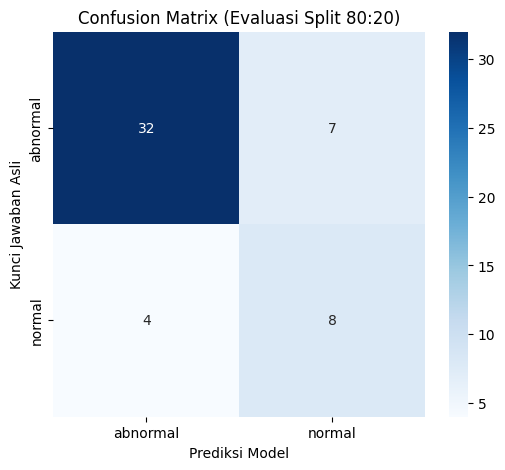

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("\n--- PROSES 2: VISUALISASI CONFUSION MATRIX ---")

# Buat Matriks
cm = confusion_matrix(y_test_final_encoded, y_pred_final)

# Gambar Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.title('Confusion Matrix (Evaluasi Split 80:20)')
plt.ylabel('Kunci Jawaban Asli')
plt.xlabel('Prediksi Model')
plt.show()

### 6.3 Menyimpan Model (Deployment Ready)

Setelah model terbukti bekerja dengan baik, kita simpan model tersebut agar bisa digunakan kembali tanpa perlu training ulang.

Kita menyimpan tiga komponen penting:

- Model SVM → untuk melakukan prediksi

- Scaler → untuk menyesuaikan skala data baru

- Label Encoder → untuk mengubah hasil prediksi angka menjadi teks

In [20]:
import pickle
import os

print("\n--- PROSES 3: SIMPAN MODEL FINAL (.PKL) ---")

filename = 'model_jantung_svm.pkl'

# Bungkus jadi satu paket
model_packet = {
    "model": model_final,
    "scaler": scaler,
    "encoder": le
}

# Simpan ke hardisk
with open(filename, 'wb') as file:
    pickle.dump(model_packet, file)

print(f"[SUKSES] File '{filename}' berhasil disimpan!")
print(f"Lokasi: {os.getcwd()}")
print("Status: SIAP UNTUK STREAMLIT.")


--- PROSES 3: SIMPAN MODEL FINAL (.PKL) ---
[SUKSES] File 'model_jantung_svm.pkl' berhasil disimpan!
Lokasi: C:\Dokumen\PSD\coba\tugas
Status: SIAP UNTUK STREAMLIT.


### 6.4 Hasil Deployment Streamlit

link streamlit yang sudah di deploy : https://deteksisuarajantung.streamlit.app/